In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet




from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [ ]:
# Load the data
df = pd.read_csv('auto-mpg.csv')

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# convert horsepower into int

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower']

In [ ]:
df['horsepower'].astype('float64')

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
393,86.0
394,52.0
395,84.0
396,79.0


In [ ]:
# convert ? to null

df.replace('?',np.nan,inplace = True)

In [ ]:
# drop null values

df = df.dropna()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [ ]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
df[df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [ ]:
# checking ?

for i in df.columns:
  print(df[df[i]=='?'].shape)


(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)


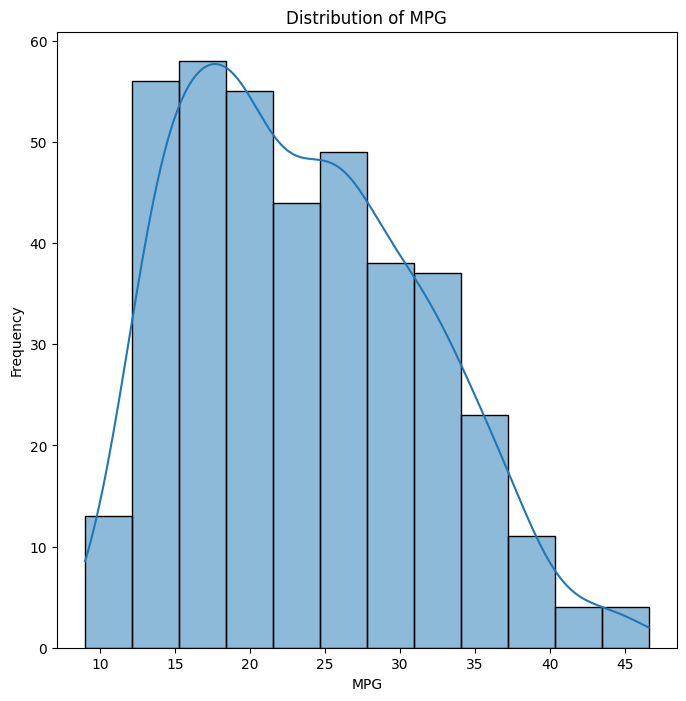

In [ ]:
# EDA

plt.figure(figsize=(8,8))
sns.histplot(df['mpg'],kde=True)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

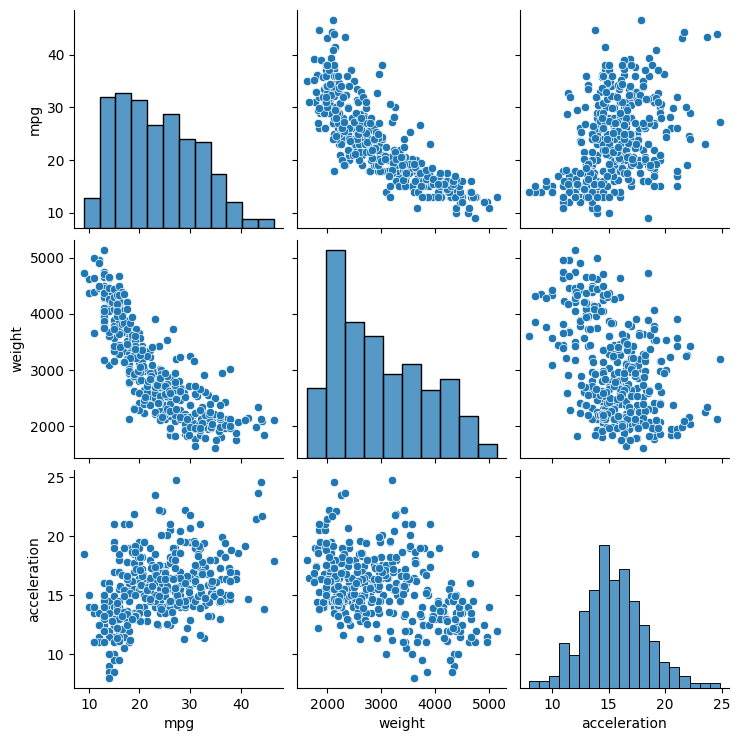

In [ ]:
sns.pairplot(df[['mpg','horsepower', 'weight','acceleration']])
plt.show()

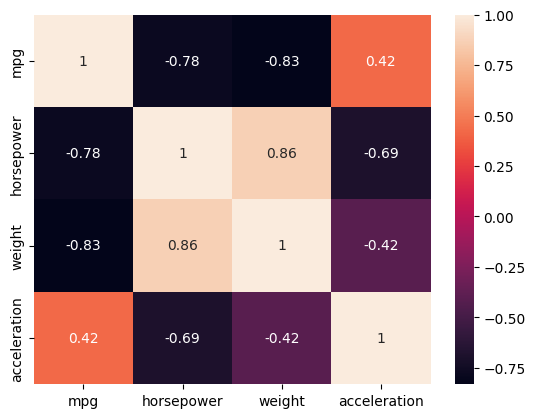

In [ ]:
# correlation

sns.heatmap(df[['mpg','horsepower', 'weight','acceleration']].corr(),annot=True)
plt.show()

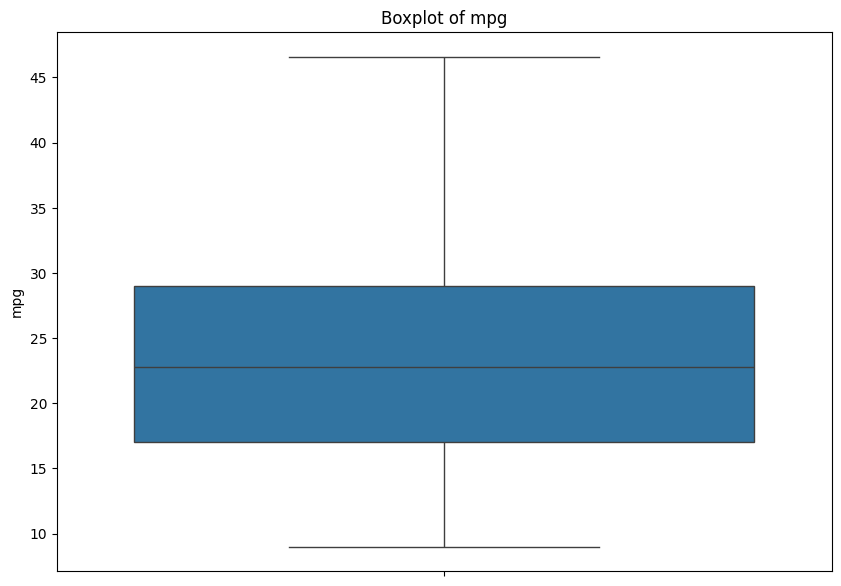

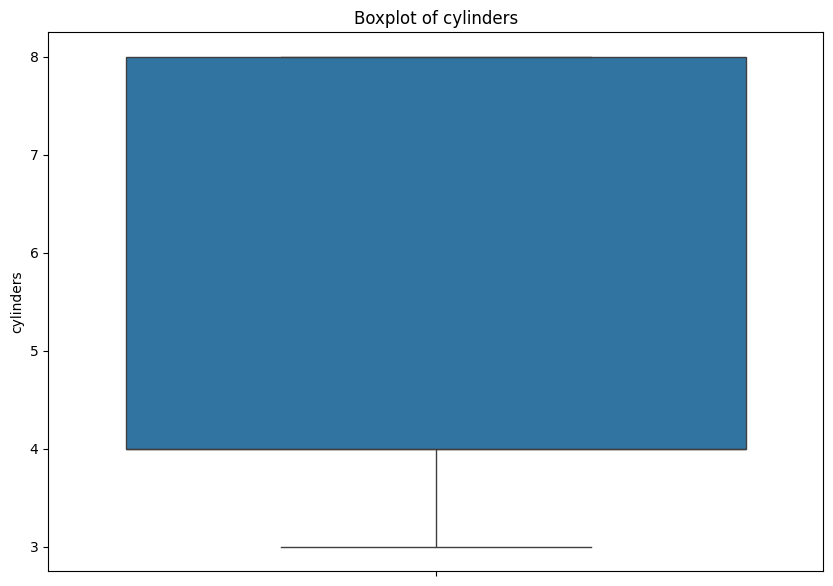

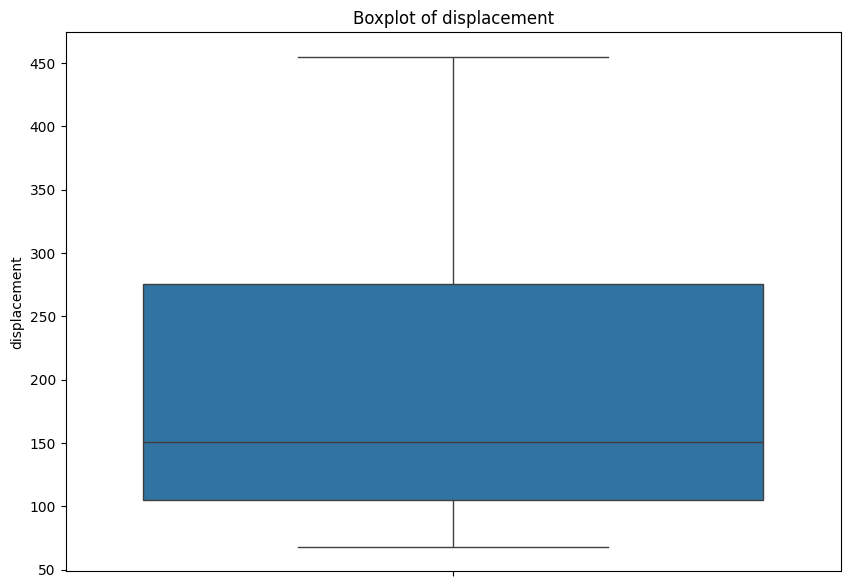

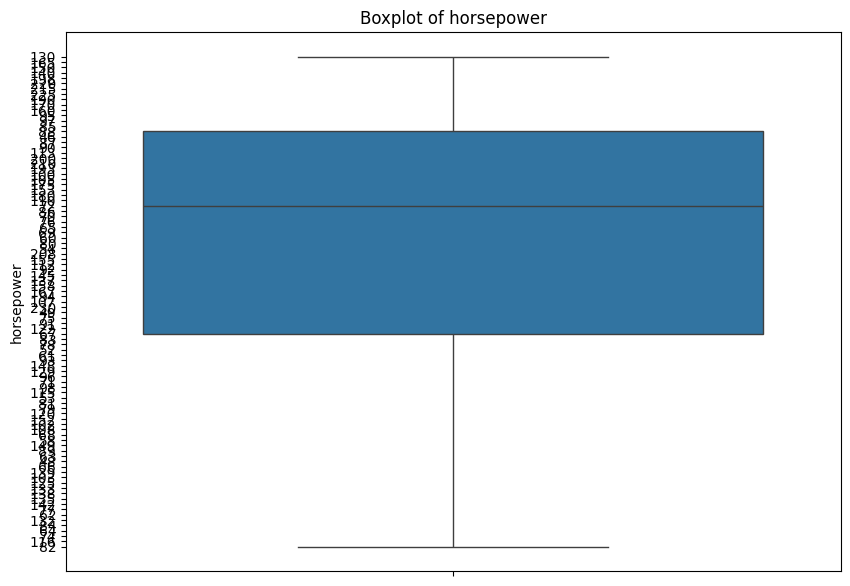

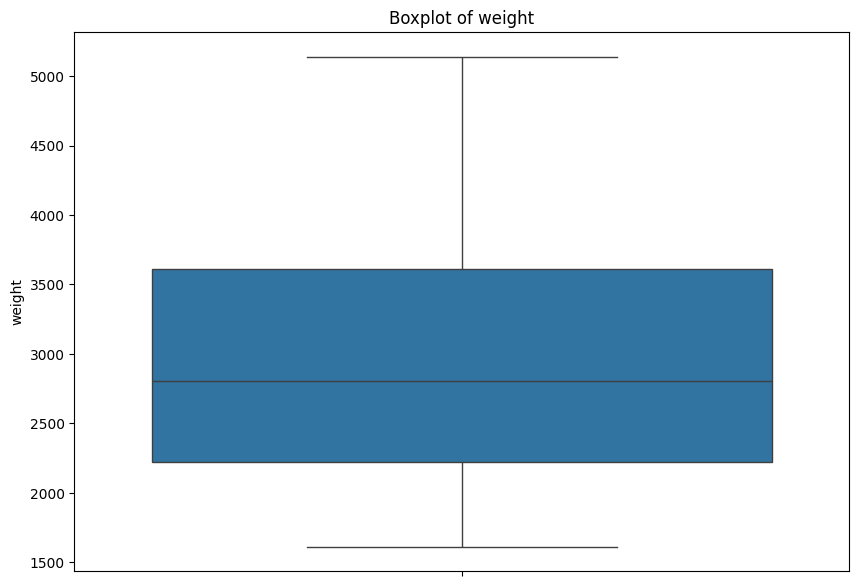

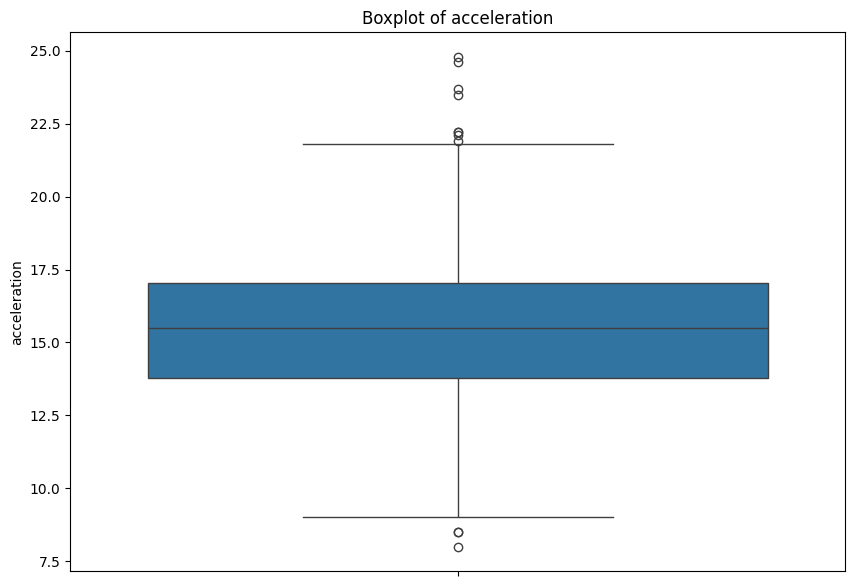

In [ ]:
# look for outliers

num_cols=["mpg","cylinders","displacement","horsepower","weight","acceleration"]
for col in num_cols:
  plt.figure(figsize=(10,7))
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


In [ ]:
# Ensure columns are numeric
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove outliers using IQR
for col in num_cols:
    if df[col].dtype != 'float64' and df[col].dtype != 'int64':
        print(f"Skipping non-numeric column: {col}")
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"{col}: {len(outliers)} outliers")


mpg: 0 outliers
cylinders: 0 outliers
displacement: 0 outliers
horsepower: 10 outliers
weight: 0 outliers
acceleration: 11 outliers


In [ ]:
# Convert numeric-looking strings to numbers
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Keep only numeric columns
num_cols = [col for col in num_cols if pd.api.types.is_numeric_dtype(df[col])]

print("Using numeric columns:", num_cols)

# Remove outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("Outliers removed successfully!")
print("Final shape:", df.shape)


Using numeric columns: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
Outliers removed successfully!
Final shape: (373, 9)


In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
x= df.drop(['mpg','car name'],axis =1)
y = df['mpg']

In [ ]:
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
392,4,151.0,90,2950,17.3,82,1
393,4,140.0,86,2790,15.6,82,1
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [ ]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
392,27.0
393,27.0
395,32.0
396,28.0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [ ]:
x_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
366,6,225.0,85,3465,16.6,81,1
203,4,97.0,71,1825,12.2,76,2
36,6,250.0,88,3302,15.5,71,1
309,4,98.0,76,2144,14.7,80,2
84,4,97.0,88,2100,16.5,72,3
...,...,...,...,...,...,...,...
220,4,85.0,70,1945,16.8,77,3
272,4,151.0,85,2855,17.6,78,1
83,4,98.0,80,2164,15.0,72,1
252,6,231.0,105,3535,19.2,78,1


In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((298, 7), (75, 7), (298,), (75,))

In [ ]:
lin = LinearRegression()
las = Lasso()
rid = Ridge()
ela = ElasticNet()

In [ ]:
lin

LinearRegression()

In [ ]:
lin.fit(x_train,y_train)

LinearRegression()

In [ ]:
las.fit(x_train,y_train)
rid.fit(x_train,y_train)
ela.fit(x_train,y_train)

ElasticNet()

In [ ]:
y_pred_lin = lin.predict(x_test)
y_pred_las = las.predict(x_test)
y_pred_rid = rid.predict(x_test)
y_pred_ela = ela.predict(x_test)

In [ ]:
print(r2_score(y_test,y_pred_lin))
print(r2_score(y_test,y_pred_las))
print(r2_score(y_test,y_pred_rid))
print(r2_score(y_test,y_pred_ela))

0.8520238712227465
0.8351637354112955
0.8520250803176299
0.8368261117815512


In [ ]:
print(mean_squared_error(y_test,y_pred_lin))
print(mean_squared_error(y_test,y_pred_las))
print(mean_squared_error(y_test,y_pred_rid))
print(mean_squared_error(y_test,y_pred_ela))

8.174239761681799
9.105598040048267
8.174172970966612
9.013767937876326
